In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import zlib
import sys

__BYTES_TO_MB__ = (10**6)*1.0

In [7]:
img = cv.imread('/Users/vijay-5428/Downloads/InternalComms.jpg', cv.IMREAD_GRAYSCALE)
img = cv.dilate(img, kernel=np.ones((5, 5), np.uint8), iterations=1)

In [9]:
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [14]:
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
print(sys.getsizeof(magnitude_spectrum)/__BYTES_TO_MB__)
print(sys.getsizeof(zlib.compress(magnitude_spectrum, zlib.Z_BEST_COMPRESSION))/__BYTES_TO_MB__)

3.740128
3.250463


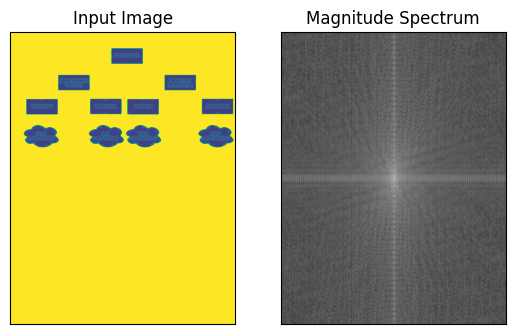

In [11]:
plt.subplot(121),plt.imshow(img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
phase_spectrum = 20*np.log(cv.phase(dft_shift[:,:,0],dft_shift[:,:,1]))

In [13]:
print(phase_spectrum)

[[ 31.003899   17.550165   25.66135   ...  35.734104   35.216
   -6.1116834]
 [-10.303469   31.004269   35.44291   ...  12.880812   11.755699
   21.692411 ]
 [ 23.295223   -1.5110366  13.775169  ...  29.595123   27.668762
   34.11016  ]
 ...
 [ 25.830341    4.7475443  23.455221  ...  35.075916   31.307587
   36.24716  ]
 [ 36.55418    27.324877   33.861557  ...   9.287293    2.801341
   15.899279 ]
 [ 18.67629   -33.935287    5.8771973 ...  26.715164   25.289972
   31.003532 ]]
